# Exploratory data analysis of goodreads data

## Looking for insights within data to answer following questions:
1. What is the distribution of book languages? Apart from Enlish books, which other languages are popular?
2. What are the Top 10 rated books on Goodreads with over 1000 ratings?
3. Is there a correlation between book rating and number of pages?
4. What are the Top 10 most rated books?
5. What is the ratings distribution over the books?

In [23]:
# Import libraries
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
plt.rcdefaults()
import seaborn as sns

In [24]:
# Import CSV data as data frame
df = pd.read_csv('books.csv')

## Data Pre-processing: Check & Clean

In [32]:
# Check for data type
df.count()
df.dtypes
df.head(3)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,Unnamed: 12
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,439785960,9.78E+12,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,NaN
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,439358078,9.78E+12,eng,870,2153167,29221,09.01.04,Scholastic Inc.,NaN
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9.78E+12,eng,352,6333,244,11.01.03,Scholastic,NaN


##### The data includes following book information:

- bookID: Individual ID number, which is unique for each book
- authors: Book author
- average_rating: Average rating of all user votes
- isbn: Number with book informationsuch as publisher etc.
- isbn13: New format for ISBN, 13 number digit code
- language_code: Language of the book
- num_pages: Number of book pages
- ratings_count: Amount of ratings left by users
- text_reviews_count: Amount of text reviews left by users
- publication_date: Publication date
- publisher: Information about publishing journal
- Unnamed: 12: Additional column with non-relevant data

In [29]:
# Visualize data sorted by average_rating value
df_sorted = df.sort_values(by='average_rating')

In [4]:
# Drop column with NaN values
missing_data = df.isnull()
df_sorted.drop('Unnamed: 12',axis = 1, inplace=True)

In [5]:
# Drop rows with wrong data entries
df_clean = df_sorted[4:]

## Exploratory Data Analysis

### Question 1. What is the distribution of book languages? Is French the second most popular literature language after English?

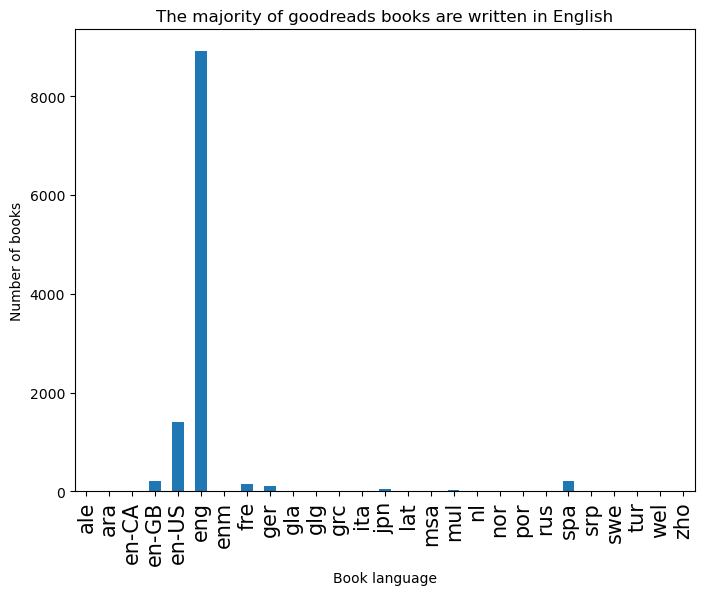

In [79]:
# Use bar chart to visualize amount of books per language
df_bar = df_clean.groupby('language_code')['title'].count()

df_bar.plot(kind='bar', figsize=(8, 6), align='center')
plt.title('The majority of goodreads books are written in English')
plt.ylabel('Number of books')
plt.xlabel('Book language')
plt.xticks(fontsize = 15);

In [7]:
df_bar.sort_values(ascending=False,inplace=True)
df_bar.head(5)

language_code
eng      8908
en-US    1408
spa       218
en-GB     214
fre       144
Name: title, dtype: int64

#### Analysis: The most popular language is indeed English. The second most popular however is Spanish and not as expected French.

### Question 2. What are the Top 10 rated books on Goodreads with over 1000 ratings? Have you read 50% of these books?

In [8]:
df_top10 = df_clean[['title','average_rating','ratings_count','authors','publication_date']]
df_top10 = df_top10[df_top10['ratings_count'] > 1000].tail(10)
df_top10.head(10)

,title,average_rating,ratings_count,authors,publication_date
1530,The Life and Times of Scrooge McDuck,4.67,2467,Don Rosa,06.01.05
6594,The Days Are Just Packed,4.69,20308,Bill Watterson,09.01.93
6500,The Complete Aubrey/Maturin Novels (5 Volumes),4.7,1338,Patrick O'Brian,10/17/2004
5616,Study Bible: NIV,4.7,4166,Anonymous,10.01.02
6596,Calvin and Hobbes: Sunday Pages 1985-1995: An ...,4.71,3613,Bill Watterson,9/17/2001
6593,Homicidal Psycho Jungle Cat (Calvin and Hobbes...,4.72,15365,Bill Watterson,09.06.94
6,Harry Potter Collection (Harry Potter #1-6),4.73,28242,J.K. Rowling,09.12.05
6592,It's a Magical World (Calvin and Hobbes #11),4.76,23875,Bill Watterson,09.01.96
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,4.78,41428,J.K. Rowling/Mary GrandPré,9/13/2004
6590,The Complete Calvin and Hobbes,4.82,32213,Bill Watterson,09.06.05


Text(0.5, 1.0, 'Many Harry Potter and Calvin&Hobbes Titles within TOP10')

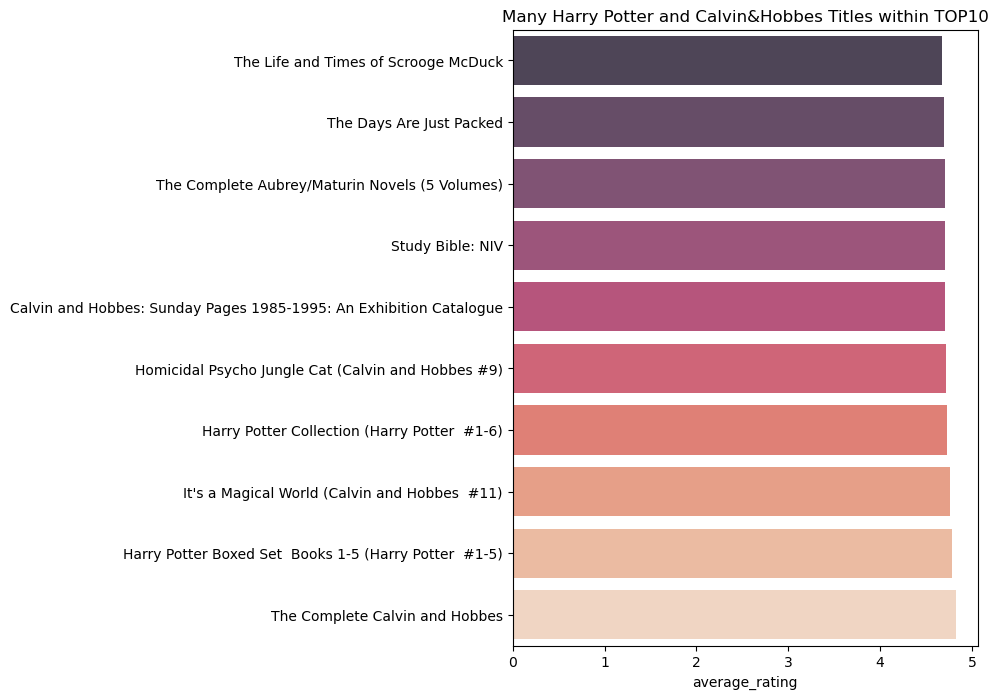

In [78]:
top10_titles = df_top10['title']
top10_ratings = df_top10['average_rating']

plt.figure(figsize=(6,8))
sns.barplot(top10_ratings, top10_titles, alpha=0.8, palette='rocket')
plt.ylabel('')
plt.title('Many Harry Potter and Calvin&Hobbes Titles within TOP10')

#### Analysis: 7 out of 10 best rated books on Goodreads are either Harry Potter or Calvin and Hobbes books. The highest score achieved was 4.82 with over 300.00 votes.

### Question 3. Is there a correlation between book rating and number of pages? Probably not, right? Only evaluate books with more than 1000 ratings.

In [10]:
# Correct data type from object to int64 for num_pages and float64 for average_rating
df_clean_corr = df_clean.astype({'  num_pages': 'int64'})
df_clean_corr = df_clean_corr.astype({'average_rating': 'float64'})

In [11]:
# Drop books with no rating
df_clean_corr = df_clean_corr[df_clean_corr['ratings_count'] > 1000]
df_clean_corr[['average_rating', '  num_pages']].corr()

,average_rating,num_pages
average_rating,1.000000,0.177937
num_pages,0.177937,1.000000


Text(0.5, 1.0, 'Only a few books with more than 2000 pages have been reviewed over 1000 times.')

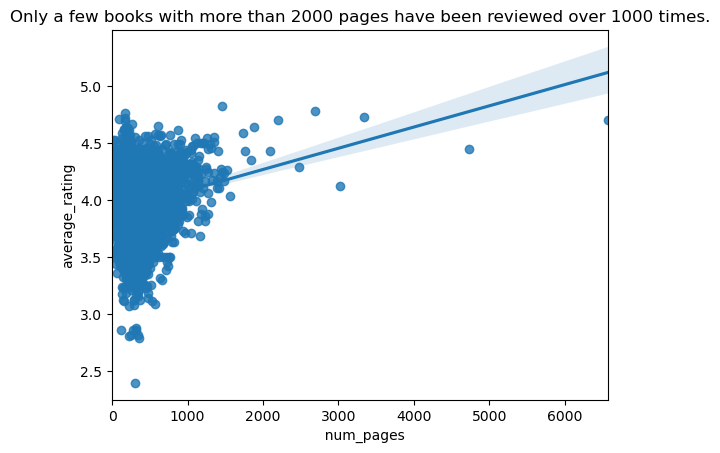

In [12]:
sns.regplot(y='average_rating',x='  num_pages', data=df_clean_corr)
plt.title('Only a few books with more than 2000 pages have been reviewed over 1000 times.')

#### Analysis: According to the data, there is no significant correlation between number of pages and given review. Nevertheless, the plot shows that there are only a few ratings for book titles with over 2000 pages, which indicates that readers prefer shorter literature. Within the range up to 1500 pages, there is a huge spread in terms of average rating showing minor correlation between both variables.

### Question 4: What are the Top 10 most rated books?

In [55]:
df_q4 = df_clean.sort_values('ratings_count', ascending = False).head(10).set_index('title')

Text(0, 0.5, '')

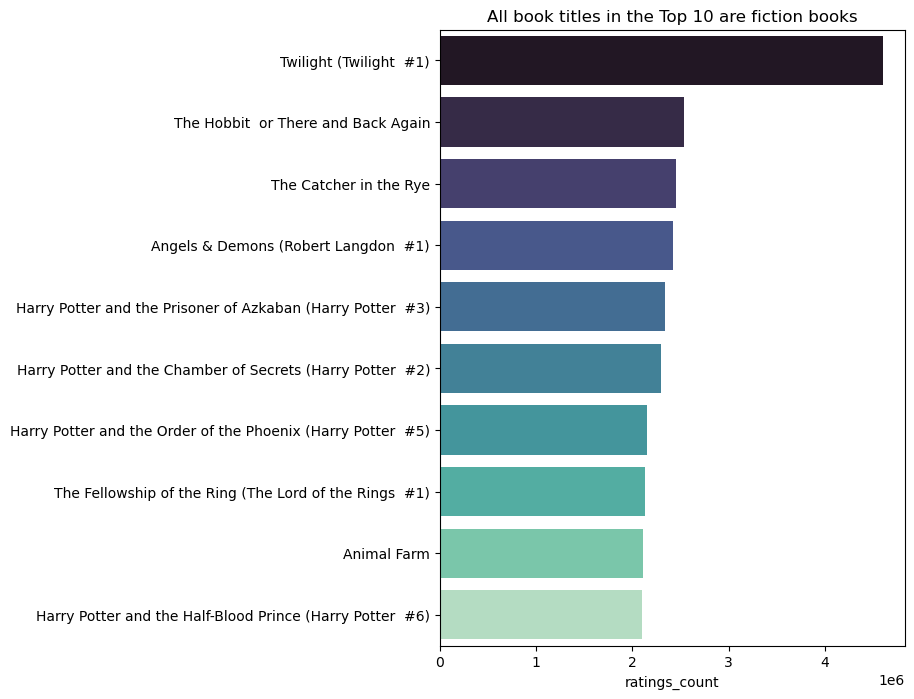

In [77]:
plt.figure(figsize=(6,8))
sns.barplot(df_q4['ratings_count'], df_q4.index, palette ='mako')
plt.title('All book titles in the Top 10 are fiction books')
plt.ylabel('')

#### Analysis: The 10 most often rated books have over 200.000 votes and are all fiction books, which seem to have the biggest follower base on Goodreads. Apart from the Harry Potter Series, Twilight or Lord of the Rings, also classic titles such as Animal Farm and Cather in the Rye are often reviewed book titles.

### Question 5: What is the ratings distribution over the books?

In [73]:
df_clean.head()

AttributeError: 'DataFrame' object has no attribute 'value_counts'

Text(0, 0.5, 'Density')

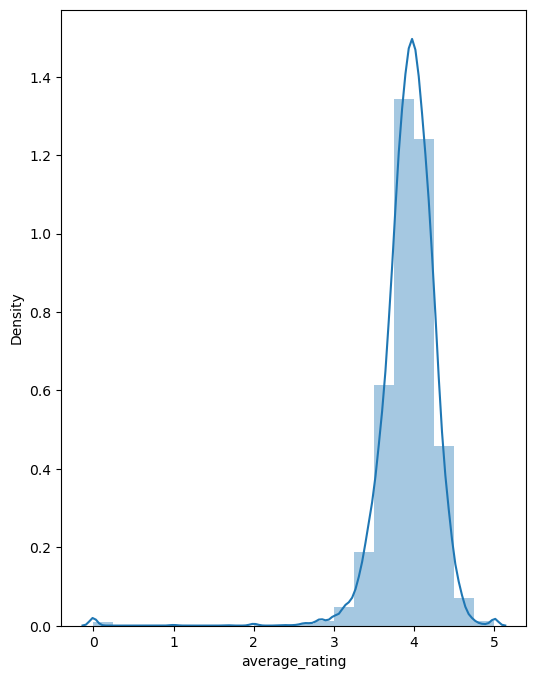

In [85]:
plt.figure(figsize = (6,8))
sns.distplot(df_clean['average_rating'], bins = 20)
plt.ylabel('Density')

#### Analysis: The majority of books have a rating between 3.5 and 4.5 with most books being rated with 4 stars. The number of scores of 0 or 5 stars are not significant.